In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import matplotlib.cm as cm

In [8]:
with open(f'../../trained_models/ST260_Day1_AllPairs_trained.pkl',"rb") as f:
    trained_all = pkl.load(f)

# count element types in all trees
names = ['Independence','Gaussian','Frank','Clayton','Gumbel']
orientations = [None, '0°', '90°', '180°', '270°']
counters = {n: 0 for n in names+orientations} #explicit declaration just for ordering

for tree in trained_all['models']:
    for mixture in tree:
        for copula in mixture.bvcopulas:
            for i in range(2):
                counters[copula[i]] = 0 if copula[i] not in counters else counters[copula[i]]+1
counters

{'Independence': 356,
 'Gaussian': 587,
 'Frank': 698,
 'Clayton': 1046,
 'Gumbel': 5,
 None: 1641,
 '0°': 80,
 '90°': 57,
 '180°': 868,
 '270°': 46}

In [9]:
# count element types in the 1st tree only (neuron responses vs average activity (global neuropil))
counters = {n: 0 for n in names+orientations}

for mixture in trained_all['models'][0]:
    for copula in mixture.bvcopulas:
        for i in range(2):
            counters[copula[i]] = 0 if copula[i] not in counters else counters[copula[i]]+1
counters

{'Independence': 28,
 'Gaussian': 44,
 'Frank': 55,
 'Clayton': 79,
 'Gumbel': 2,
 None: 127,
 '0°': 8,
 '90°': 5,
 '180°': 65,
 '270°': 3}

In [13]:
counters = {n: 0 for n in ['Gaussian','Frank','Clayton','Gumbel']}
total = 0
for tree in trained_all['models']:
    for mixture in tree:
        for copula in mixture.bvcopulas:
                counters[copula[0]] = 0 if copula[0] not in counters else counters[copula[0]]+1
                if copula[0]!='Independence':
                    total += 1
percent = [100*counters[n]/total for n in ['Gaussian','Frank','Clayton','Gumbel']]
percent

[25.128424657534246, 29.88013698630137, 44.77739726027397, 0.21404109589041095]

In [15]:
# count combinations in the 1st tree
counters = {}
c_all = 0
for tree in trained_all['models']:
    for mixture in tree:
        name = ''.join([f"{a}{b}" for a,b in zip(*np.array(mixture.bvcopulas).T)])
        counters[name] = 0 if name not in counters else counters[name]+1
        c_all += 1
counters

{'GaussianNoneClayton180°': 345,
 'FrankNoneClayton180°': 306,
 'FrankNoneClayton0°': 38,
 'GaussianNoneClayton0°Clayton180°': 13,
 'FrankNone': 189,
 'GaussianNoneClayton180°Clayton270°': 24,
 'IndependenceNone': 116,
 'FrankNoneClayton180°Clayton270°': 14,
 'FrankNoneGumbel0°': 4,
 'IndependenceNoneGaussianNoneClayton180°': 73,
 'IndependenceNoneFrankNoneClayton90°': 9,
 'FrankNoneClayton90°Clayton180°': 3,
 'FrankNoneClayton0°Clayton180°': 7,
 'FrankNoneClayton90°': 12,
 'IndependenceNoneFrankNoneClayton180°': 44,
 'IndependenceNoneFrankNone': 50,
 'GaussianNoneClayton90°Clayton180°': 11,
 'IndependenceNoneGaussianNoneClayton0°': 8,
 'GaussianNone': 62,
 'IndependenceNoneGaussianNone': 25,
 'IndependenceNoneGaussianNoneClayton90°Clayton180°': 11,
 'FrankNoneClayton270°': 4,
 'IndependenceNoneClayton180°': 1,
 'GaussianNoneClayton0°': 1,
 'IndependenceNoneFrankNoneClayton90°Clayton180°': 2,
 'IndependenceNoneGaussianNoneClayton90°': 2,
 'IndependenceNoneGaussianNoneClayton0°Clayton18

In [16]:
counters['GaussianNone']/(c_all-counters['IndependenceNone'])

0.04813664596273292

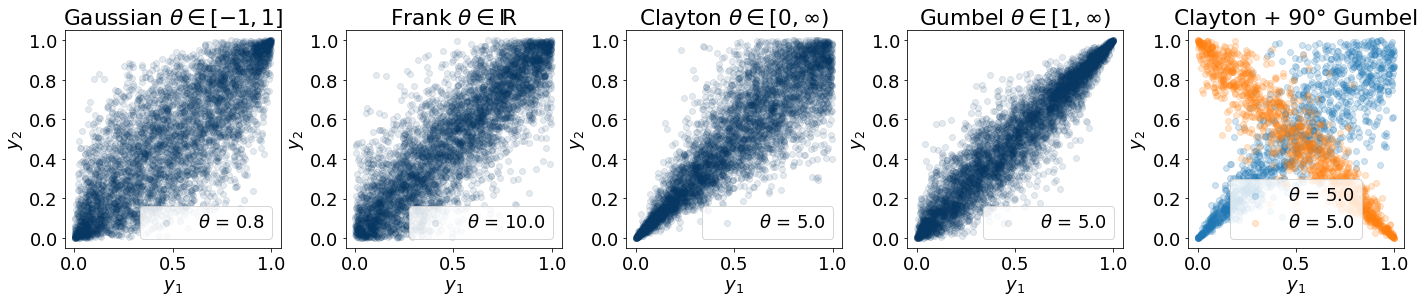

In [17]:
# here we generate some synthetic samples
import torch
import copulagp.bvcopula as bvcopula

NSamp = int(5000)
color='#073763ff'

X = np.linspace(0.,1.,NSamp) 

plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(1,5,figsize=(24,4.0))

model = bvcopula.GaussianCopula(torch.ones(NSamp).float()*0.8)
Y = model.sample().numpy().squeeze()
ax[0].scatter(*Y.T, color=color, alpha=0.1, label=r'$\theta$ = 0.8')# color=colors)
ax[0].set_xlabel('$y_1$')
ax[0].set_ylabel('$y_2$')
ax[0].set_title(r'Gaussian $\theta \in [-1,1]$')
ax[0].legend(loc=4)

model = bvcopula.FrankCopula(torch.ones(NSamp).float()*10.0)
Y = model.sample().numpy().squeeze()
ax[1].scatter(*Y.T, color=color, alpha=0.1, label=r'$\theta$ = 10.0')# color=colors)
ax[1].set_xlabel('$y_1$')
ax[1].set_ylabel('$y_2$')
ax[1].set_title(r'Frank $\theta \in {\rm I\!R}$')
ax[1].legend(loc=4)

model = bvcopula.ClaytonCopula(torch.ones(NSamp).float()*5.0, rotation='0°')
Y = model.sample().numpy().squeeze()
ax[2].scatter(*Y.T, color=color, alpha=0.1, label=r'$\theta$ = 5.0')# color=colors)
ax[2].set_xlabel('$y_1$')
ax[2].set_ylabel('$y_2$')
ax[2].set_title(r'Clayton $\theta \in [0,\infty)$')
ax[2].legend(loc=4)

model = bvcopula.GumbelCopula(torch.ones(NSamp).float()*5.0, rotation='0°')
Y = model.sample().numpy().squeeze()
ax[3].scatter(*Y.T, color=color, alpha=0.1, label=r'$\theta$ = 5.0')# color=colors)
ax[3].set_xlabel('$y_1$')
ax[3].set_ylabel('$y_2$')
ax[3].set_title(r'Gumbel $\theta \in [1,\infty)$')
ax[3].legend(loc=4)

# for i in range(4):
#     sh = 0
#     ax[i].text(0, 0.93+sh, "{:.0f}%".format(percent[i]), style='italic',
#         bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

for r,c,C in zip(['0°','90°'],['C0','C1'],[bvcopula.ClaytonCopula,bvcopula.GumbelCopula]):
    model = C(torch.ones(int(NSamp/4)).float()*5.0, rotation=r)
    Y = model.sample().numpy().squeeze()
    ax[4].scatter(*Y.T, color=c, alpha=0.2, label=r'$\theta$ = 5.0')# color=colors)
ax[4].set_xlabel('$y_1$')
ax[4].set_ylabel('$y_2$')
ax[4].set_title('Clayton + 90° Gumbel')
ax[4].legend()

plt.subplots_adjust(wspace=0.3)

plt.savefig(f'../../results/families.svg')
fig.show()

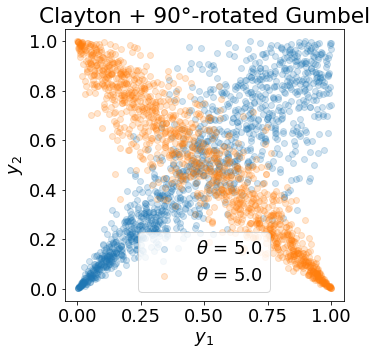

In [13]:
fig = plt.figure(figsize=(5,5))

for r,c,C in zip(['0°','90°'],['C0','C1'],[ClaytonCopula,GumbelCopula]):
    model = C(torch.ones(int(NSamp/4)).float()*5.0, rotation=r)
    Y = model.sample().numpy().squeeze()
    plt.scatter(*Y.T, color=c, alpha=0.2, label=r'$\theta$ = 5.0')# color=colors)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Clayton + 90°-rotated Gumbel')
plt.legend()
plt.savefig('/home/nina/CopulaGP/results/mixture.pdf')

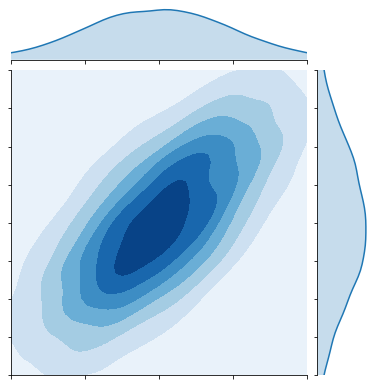

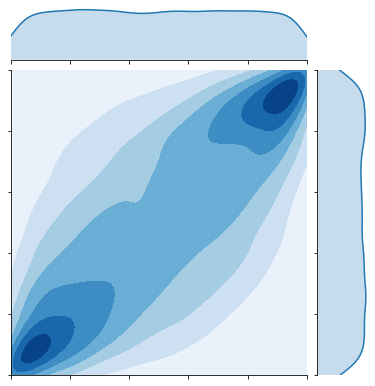

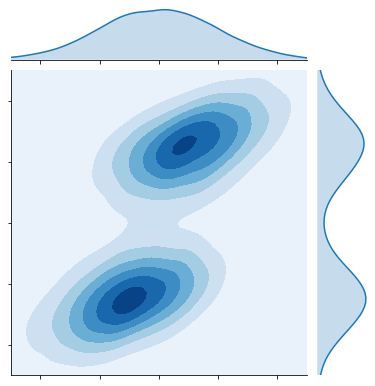

In [20]:
# here we generate some synthetic samples
from scipy.stats import norm
import seaborn as sns
import matplotlib.gridspec as gridspec

NSamp = int(1e4)
color='#073763ff'

X = np.linspace(0.,1.,NSamp) 

plt.rcParams.update({'font.size': 18})

model = GaussianCopula(torch.ones(NSamp).float()*(0.7))
Y = model.sample().numpy().squeeze()
Y_unimodal = norm.ppf(Y)
Y_bimodal = np.empty_like(Y)
Y_bimodal[:,1][Y[:,1]>0.5] = norm.ppf(2*Y[:,1][Y[:,1]>0.5]-1.)+2.5
Y_bimodal[:,1][Y[:,1]<=0.5] = norm.ppf(2*Y[:,1][Y[:,1]<=0.5])-2.5
Y_bimodal[:,0] = norm.ppf(Y[:,0])

gs = gridspec.GridSpec(1,3)

#cmap = 'Blues'
g0 = sns.jointplot(*Y_unimodal.T, kind="kde", shade=True,  shade_lowest=True, joint_kws = dict(cmap='Blues'), n_levels=6)#, cmap=cmap)
g1 = sns.jointplot(*Y.T, kind="kde", shade=True,  shade_lowest=True, joint_kws = dict(alpha=1., cmap='Blues'), n_levels=6)#, cmap=cmap)
g2 = sns.jointplot(*Y_bimodal.T, kind="kde", shade=True,  shade_lowest=True, joint_kws = dict(alpha=1., cmap='Blues'), n_levels=6)#, cmap=cmap)

g0.ax_marg_x.set_xlim(-2, 2)
g0.ax_marg_y.set_ylim(-2, 2)
g0.ax_marg_x.set_xticklabels([])
g0.ax_marg_y.set_yticklabels([])

g1.ax_marg_x.set_xlim(0, 1)
g1.ax_marg_y.set_ylim(0, 1)
g1.ax_marg_x.set_xticklabels([])
g1.ax_marg_y.set_yticklabels([])

g2.ax_marg_x.set_xlim(-2.5, 2.5)
g2.ax_marg_y.set_ylim(-5, 5)
g2.ax_marg_x.set_xticklabels([])
g2.ax_marg_y.set_yticklabels([])

plt.axis("off")

g0.savefig('/home/nina/CopulaGP/results/intro1.svg')
g1.savefig('/home/nina/CopulaGP/results/intro0.svg')
g2.savefig('/home/nina/CopulaGP/results/intro2.svg')

# plt.show()